In [1]:
import random, pylab, numpy

In [2]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1



In [3]:
def makeHist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins = bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)
    
def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    # Gets the temperatures from temperatures file
    return population

In [4]:
def getMeansAndSDs(population, sample, verbose = False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    #gets mean of sample and population
    if verbose:
        makeHist(population,
                 'Daily High 1961-2015, Population\n' +\
                 '(mean = '  + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        #Make histogram for population
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean, 2)) + ')',
                 'Degrees C', 'Number Days')   
        #Make histogram for sample
        print('Population mean =', popMean)
        print('Standard deviation of population =',
              numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =',
              numpy.std(sample))
    return popMean, sampleMean,\
           numpy.std(population), numpy.std(sample) 
            #gets standard of sample and population


In [5]:
random.seed(0)
population = getHighs()
# makeHist(population, 'Population Temperatures', 'Temp', 'Freq')

Population mean = 16.298769461986048
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986048, 17.0685, 9.437558544803602, 10.390314372048614)

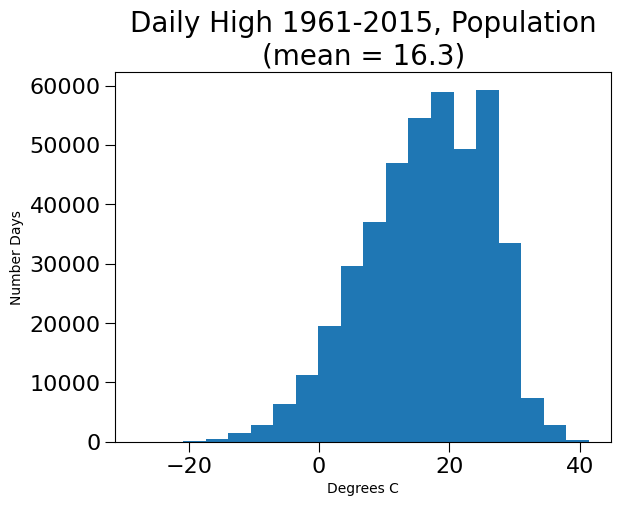

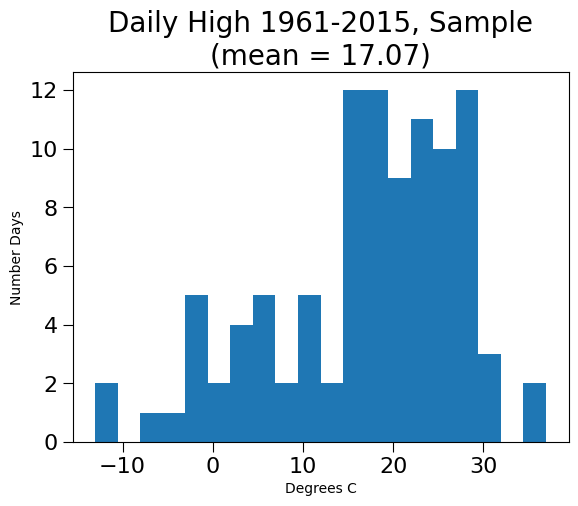

In [6]:
sample = random.sample(population, 100)
getMeansAndSDs(population, sample, True)

Mean of sample Means = 16.293
Standard deviation of sample means = 0.943


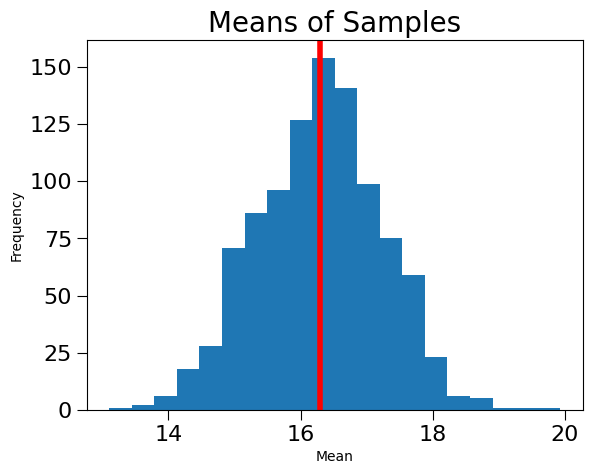

In [7]:
numSamples = 1000
sampleSize = 100
samplemeans= []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD = getMeansAndSDs(population, sample, verbose = False)
    samplemeans.append(sampleMean)
print('Mean of sample Means =',
     round(sum(samplemeans)/len(samplemeans), 3))
print('Standard deviation of sample means =',
     round(numpy.std(samplemeans), 3))
makeHist(samplemeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')


Mean of 1000 samples is close to population mean

Mean of sample Means = 16.296
Standard deviation of sample means = 0.95


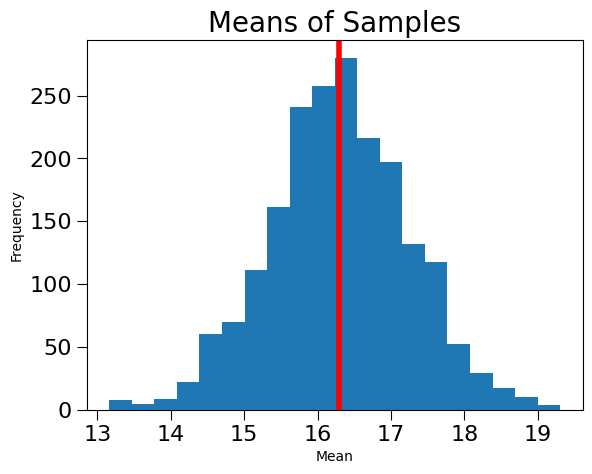

In [8]:
numSamples = 2000
sampleSize = 100
samplemeans= []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD = getMeansAndSDs(population, sample, verbose = False)
    samplemeans.append(sampleMean)
print('Mean of sample Means =',
     round(sum(samplemeans)/len(samplemeans), 3))
print('Standard deviation of sample means =',
     round(numpy.std(samplemeans), 3))
makeHist(samplemeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')


Standard deviation doesn't change if you increase numSamples

Mean of sample Means = 16.35
Standard deviation of sample means = 0.645


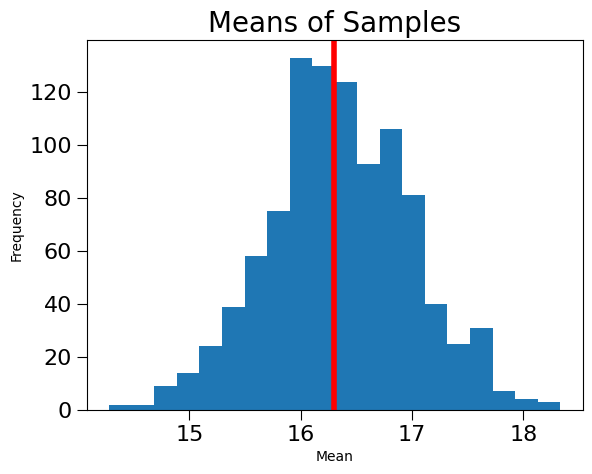

In [9]:
numSamples = 1000
sampleSize = 200
samplemeans= []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD = getMeansAndSDs(population, sample, verbose = False)
    samplemeans.append(sampleMean)
print('Mean of sample Means =',
     round(sum(samplemeans)/len(samplemeans), 3))
print('Standard deviation of sample means =',
     round(numpy.std(samplemeans), 3))
makeHist(samplemeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')


Standard deviation changes if you increase sampleSize

In [10]:
def showErrorBars(population, sizes, numTrials):
    xVals = []
    sizeMeans, sizeSDs = [], []
    for sampleSize in sizes:
        xVals.append(sampleSize) #xlab will have samplesizes
        trialMeans = []
        for t in range(numTrials):
            sample = random.sample(population, sampleSize)
            popMean, sampleMean, popSD, sampleSD =\
               getMeansAndSDs(population, sample)
            trialMeans.append(sampleMean) #trialMeans has mean for each trial
        sizeMeans.append(sum(trialMeans)/len(trialMeans)) #sizeMeans is the mean of trials
        sizeSDs.append(numpy.std(trialMeans)) #sizeSDs is the std of mean of trials
    print(sizeSDs)
    pylab.errorbar(xVals, sizeMeans,
                   yerr = 1.96*pylab.array(sizeSDs), fmt = 'o',
                   label = '95% Confidence Interval')
    pylab.title('Mean Temperature ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Sample Size')
    pylab.ylabel('Mean')
    pylab.axhline(y = popMean, color ='r', label = 'Population Mean')
    pylab.xlim(0, sizes[-1] + 10)
    pylab.legend()

[1.3139128955528219, 0.8962634357570322, 0.6694434306758106, 0.5021925475242438, 0.47904272634338063, 0.43535115717200074, 0.375262814877602]


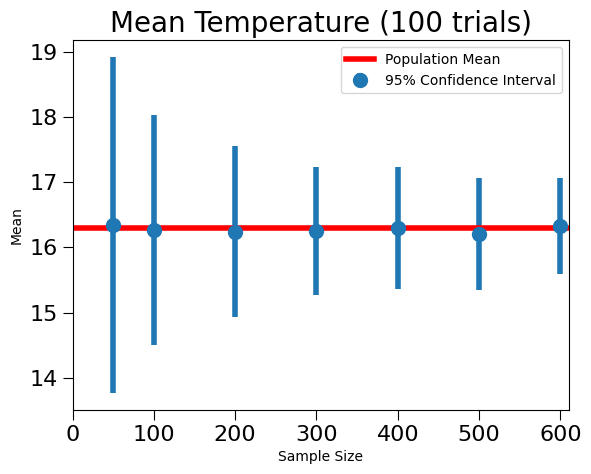

In [11]:
showErrorBars(population,
             (50, 100, 200, 300, 400, 500, 600), 100)


In [12]:
def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5


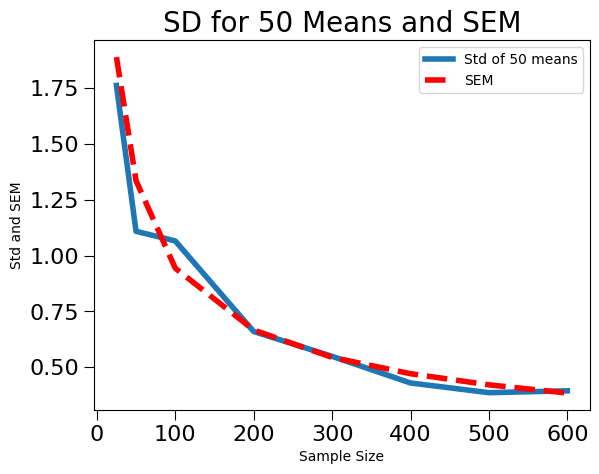

In [13]:
sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
   sems.append(sem(popSD, size)) # Get SE of means
   means = []
   for t in range(numTrials):
       sample = random.sample(population, size)
       means.append(sum(sample)/len(sample)) # Get Trial mean
   sampleSDs.append(numpy.std(means)) # Get SD of Trial means
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()

In [21]:
def getDiffs(population, sampleSizes):
    popStd = numpy.std(population) 
    diffsFracs = []
    for sampleSize in sampleSizes:
        diffs = []
        for t in range(100):
            sample = random.sample(population, sampleSize)
            diffs.append(abs(popStd - numpy.std(sample))) 
            # print(numpy.std(sample))
            # Get the difference between sample SD and population SD
        diffMean = sum(diffs)/len(diffs)
        # Get Average difference
        diffsFracs.append(diffMean/popStd)
        # Store the Average Difference of the SD as a % of Total SD
    return pylab.array(diffsFracs)*100


def plotDiffs(sampleSizes, diffs, title, label, color = 'b'):
    pylab.plot(sampleSizes, diffs, label = label,
               color = color)
    pylab.xlabel('Sample Size')
    pylab.ylabel('% Difference in SD')
    pylab.title(title)
    pylab.legend()

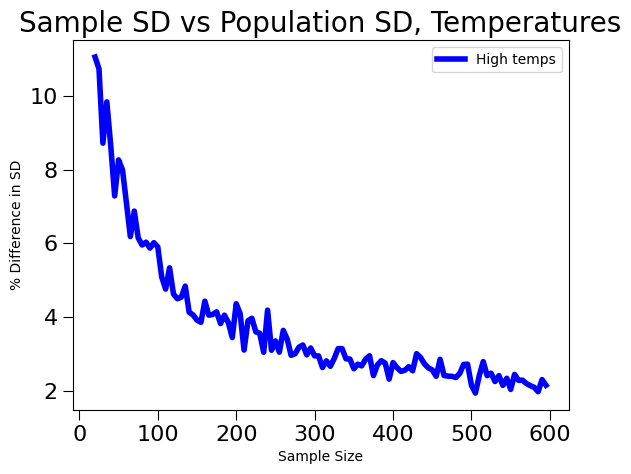

In [22]:
sampleSizes = range(20, 600, 5)
diffs = getDiffs(population, sampleSizes)
plotDiffs(sampleSizes, diffs,
         'Sample SD vs Population SD, Temperatures',
         label = 'High temps')



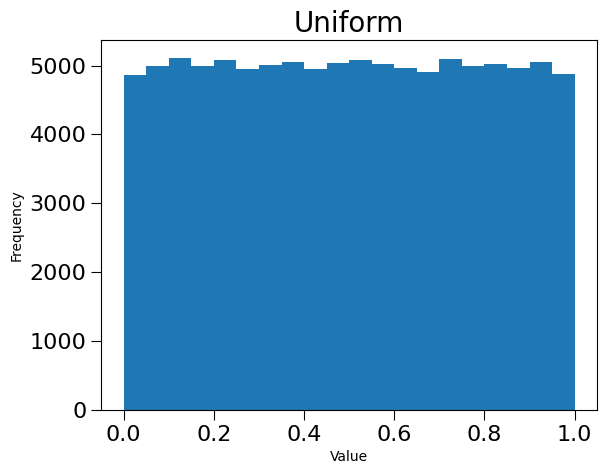

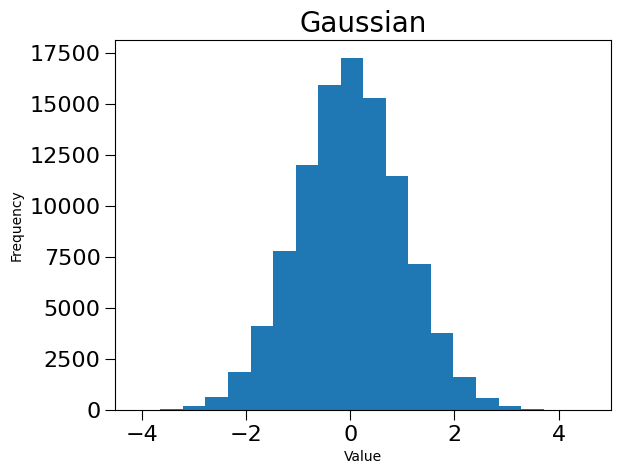

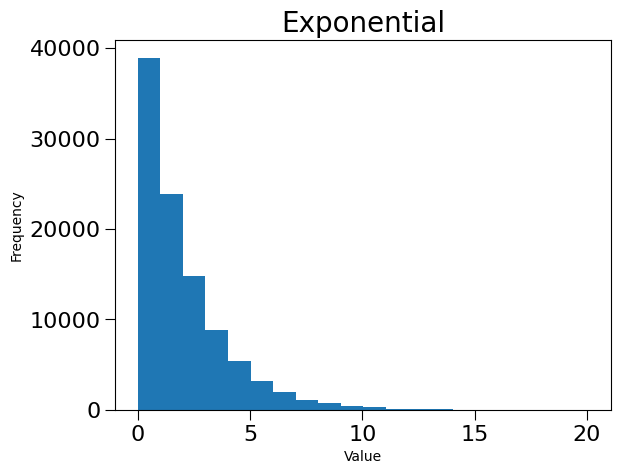

In [23]:
def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
        #Plots histograms of Uniform, normal, exp Distributions
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')
plotDistributions()

In [24]:
def compareDists():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random()) 
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
        # Generate points for Different kinds of Distrib
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    # Gets the Average Difference of the SDs as a % of population SD
    plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population', 'm')
    plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population', 'b')
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population', 'r')


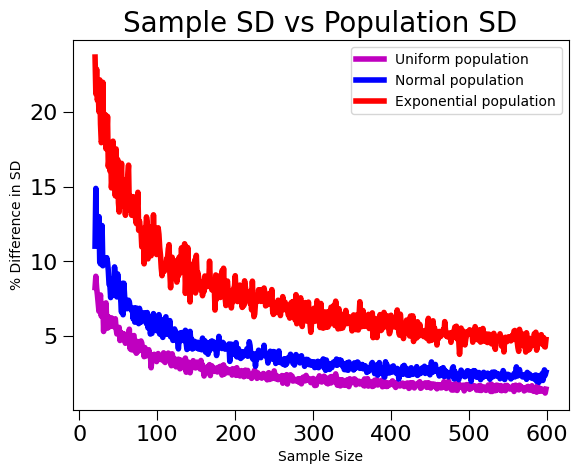

In [19]:
compareDists()

The more skew you have, the more samples you will need to get the right SD

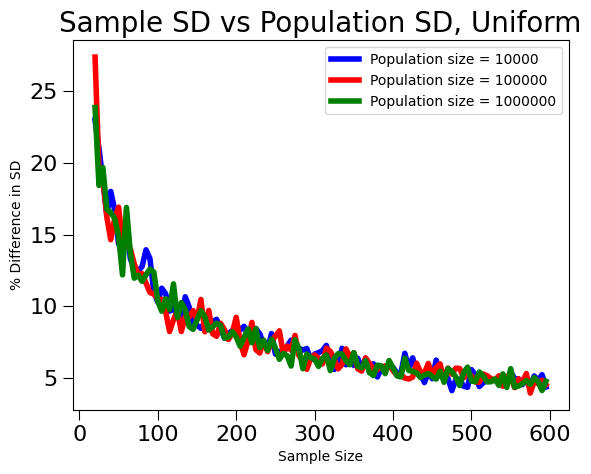

In [29]:
popSizes = (10000, 100000, 1000000)
col_sample = {10000:'b', 100000:'r', 1000000:'g'}
sampleSizes = range(20, 600, 5)
for size,col in col_sample.items():
   population = []
   for i in range(size):
       population.append(random.expovariate(0.5))
   ediffs = getDiffs(population, sampleSizes)
   plotDiffs(sampleSizes, ediffs,
             'Sample SD vs Population SD, Uniform',
             'Population size = ' + str(size), color=col)


Population Size doesn't matter

### To Estimate Mean from a Single Sample ###
1) Choose Sample size based on Skew of Population
2) Random Sample of Population
3) Get mean and SD of Sample
4) Use SD to estimate SE

In [36]:
random.seed(0)     
sampleSize = 700
numTrials = 10000
numBad = 0
popMean = sum(population)/len(population)
for t in range(numTrials):
   sample = random.sample(population, sampleSize)
   sampleMean = sum(sample)/sampleSize
   se = numpy.std(sample)/sampleSize**0.5
   if abs(popMean - sampleMean) > 1.96*se:
       numBad += 1
print('Fraction outside 95% confidence interval =',
     numBad/numTrials)

Fraction outside 95% confidence interval = 0.0551


Makes sense